In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Read and clean data

In [2]:
df = pd.read_csv('../../../Data/Wine Quality - Ordinal/WineQT.csv')
df = df.reset_index(drop=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [3]:
# drop Id column
df = df[ df.columns[:-1] ]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [31]:
df.quality.value_counts().sort_index()

quality
5    483
6    462
7    143
Name: count, dtype: int64

In [30]:
df = df[ df.quality.isin([5,6,7]) ]

fixed acidity


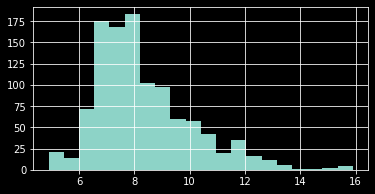

volatile acidity


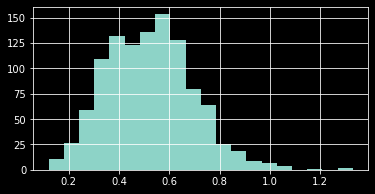

citric acid


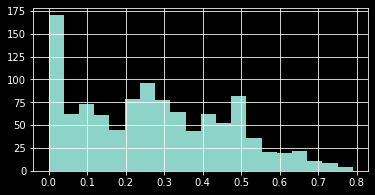

residual sugar


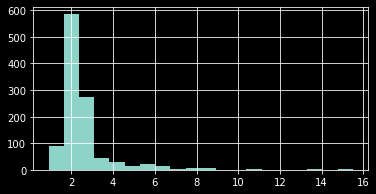

chlorides


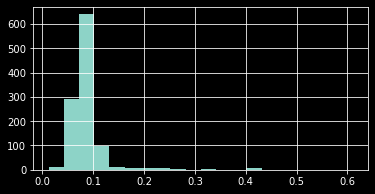

free sulfur dioxide


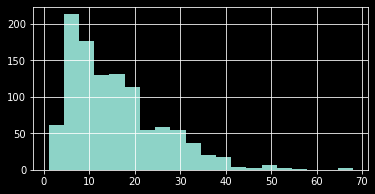

total sulfur dioxide


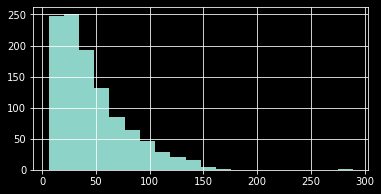

density


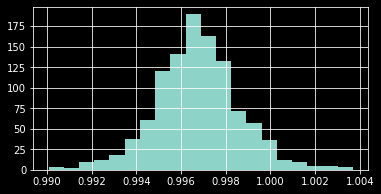

pH


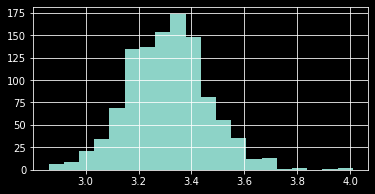

sulphates


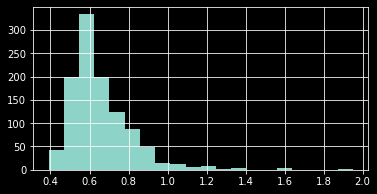

alcohol


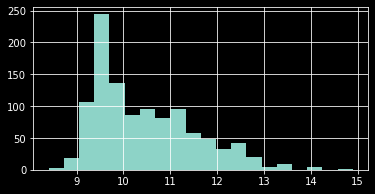

In [32]:
for col in df.columns[:-1]:
    print(col)
    df[col].hist(bins=20, figsize=(6,3));
    plt.show()
# end

# Filter outliers

In [77]:
q = 0.01

for col in df.columns[:-1]:
    print(df.shape)
    a = df[col].quantile(q)
    b = df[col].quantile(1-q)
    df = df[ df[col] >= a ]
    df = df[ df[col] <= b ]
# end
print(df.shape)

(1088, 12)
(1068, 12)
(1046, 12)
(1037, 12)
(1022, 12)
(1000, 12)
(987, 12)
(975, 12)
(956, 12)
(937, 12)
(919, 12)
(908, 12)


# Preprocess

In [78]:
X = df.drop('quality', axis=1)
y = df['quality']

# Scale features

In [79]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

for c in X.columns:
    X[c] = std_scaler.fit_transform(X[[c]])[:,0]
# end

### Label encode so that the classes start at 0

In [80]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)
y

array([0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

### Train/test split

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)

### SMOTE

In [93]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(
    sampling_strategy='auto',
    k_neighbors=20,
)

print("Original label distribution: ", Counter(y_train))

X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled label distribution:", Counter(y_train))

Original label distribution:  Counter({0: 328, 1: 313, 2: 85})
Resampled label distribution: Counter({1: 328, 0: 328, 2: 328})


# Modeling

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

dropout_rate = 0.1

n_classes = np.unique(y).shape[0]

# Create model
model = Sequential([
    Input(shape=X.shape[1]),

    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    
    Dense(n_classes, activation='softmax'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=100,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

# Display model summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 20)                240       
                                                                 
 dropout_54 (Dropout)        (None, 20)                0         
                                                                 
 dense_95 (Dense)            (None, 20)                420       
                                                                 
 dropout_55 (Dropout)        (None, 20)                0         
                                                                 
 dense_96 (Dense)            (None, 20)                420       
                                                                 
 dropout_56 (Dropout)        (None, 20)                0         
                                                                 
 dense_97 (Dense)            (None, 20)              

In [95]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=0,
)

6/6 [==============================] - 0s 798us/step


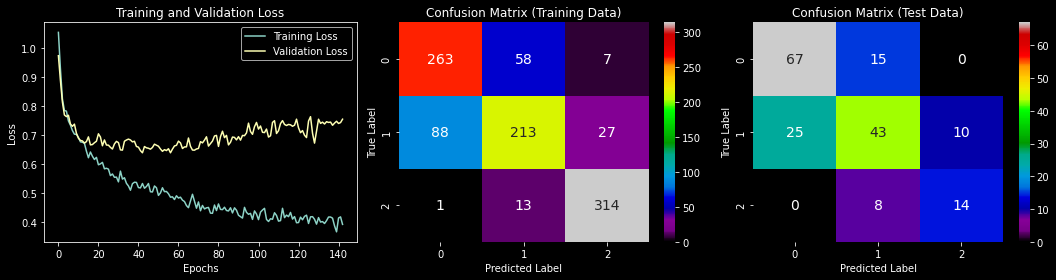

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        82
           1       0.65      0.55      0.60        78
           2       0.58      0.64      0.61        22

    accuracy                           0.68       182
   macro avg       0.65      0.67      0.66       182
weighted avg       0.68      0.68      0.68       182



In [96]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_train_pred = model.predict(X_train).argmax(axis=1)
y_test_pred  = model.predict(X_test).argmax(axis=1)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Middle subplot: Confusion Matrix (Training Data)
sns.heatmap(cm_train, annot=True, fmt='d', ax=axes[1], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
axes[1].set_title('Confusion Matrix (Training Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Right subplot: Confusion Matrix (Test Data)
sns.heatmap(cm_test, annot=True, fmt='d', ax=axes[2], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
axes[2].set_title('Confusion Matrix (Test Data)')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification report for test data
report = classification_report(y_test, y_test_pred)
print(report)

# Compare w/ other models

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=1,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=5,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=10,  weights='uniform'),
    KNeighborsClassifier(n_neighbors=50,  weights='uniform'),
    RandomForestClassifier(n_estimators=10,  max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=10,  max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=30),
    GradientBoostingClassifier(n_estimators=10,  learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=10,  learning_rate=0.1, max_leaf_nodes=10),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=10),
]

LogisticRegression()
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        82
           1       0.53      0.33      0.41        78
           2       0.40      0.73      0.52        22

    accuracy                           0.58       182
   macro avg       0.54      0.61      0.55       182
weighted avg       0.58      0.58      0.56       182



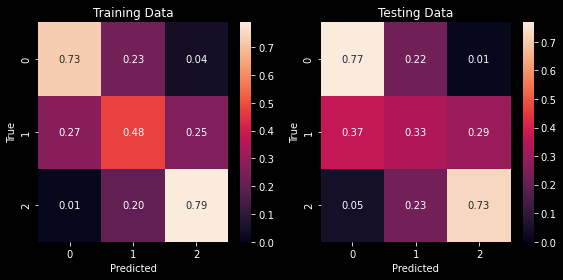

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        82
           1       0.58      0.60      0.59        78
           2       0.46      0.55      0.50        22

    accuracy                           0.61       182
   macro avg       0.58      0.59      0.58       182
weighted avg       0.62      0.61      0.61       182



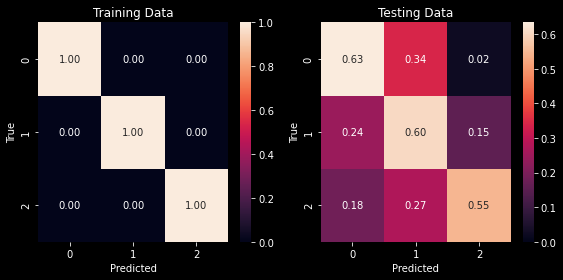

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.69      0.66      0.68        82
           1       0.56      0.54      0.55        78
           2       0.41      0.55      0.47        22

    accuracy                           0.59       182
   macro avg       0.56      0.58      0.56       182
weighted avg       0.60      0.59      0.60       182



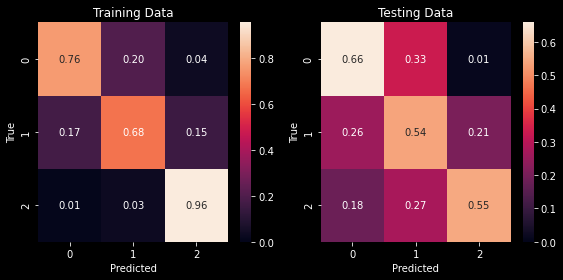

KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.71      0.70      0.70        82
           1       0.58      0.50      0.54        78
           2       0.46      0.73      0.56        22

    accuracy                           0.62       182
   macro avg       0.58      0.64      0.60       182
weighted avg       0.63      0.62      0.62       182



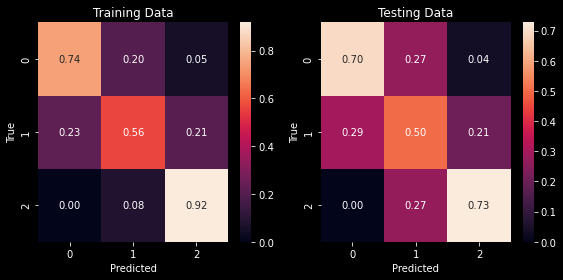

KNeighborsClassifier(n_neighbors=50)
              precision    recall  f1-score   support

           0       0.72      0.71      0.71        82
           1       0.58      0.41      0.48        78
           2       0.35      0.73      0.47        22

    accuracy                           0.58       182
   macro avg       0.55      0.61      0.55       182
weighted avg       0.61      0.58      0.58       182



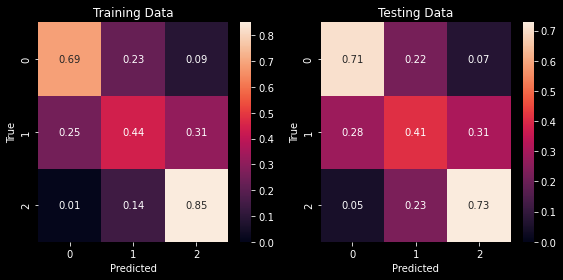

RandomForestClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.66      0.83      0.74        82
           1       0.73      0.35      0.47        78
           2       0.38      0.73      0.50        22

    accuracy                           0.61       182
   macro avg       0.59      0.63      0.57       182
weighted avg       0.66      0.61      0.59       182



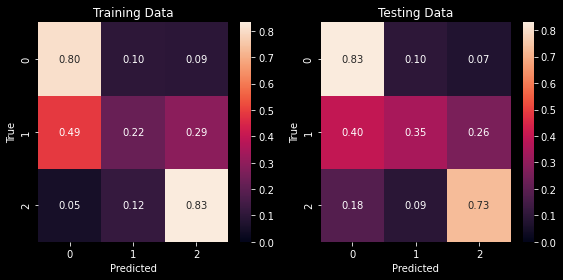

RandomForestClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        82
           1       0.62      0.46      0.53        78
           2       0.42      0.64      0.51        22

    accuracy                           0.62       182
   macro avg       0.58      0.62      0.59       182
weighted avg       0.62      0.62      0.61       182



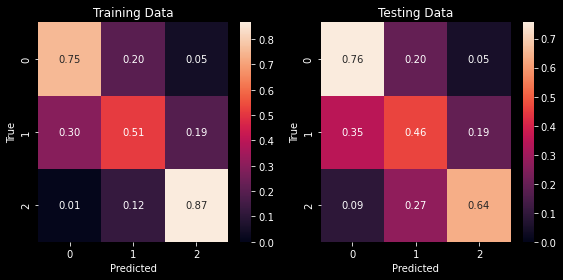

RandomForestClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        82
           1       0.71      0.32      0.44        78
           2       0.40      0.77      0.52        22

    accuracy                           0.63       182
   macro avg       0.60      0.66      0.58       182
weighted avg       0.67      0.63      0.60       182



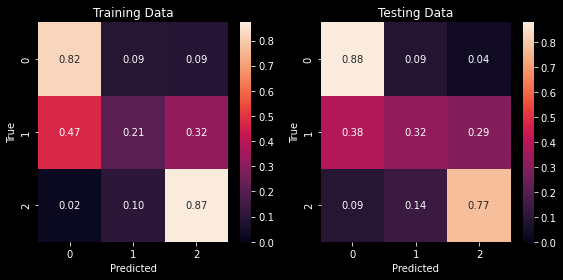

RandomForestClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        82
           1       0.65      0.53      0.58        78
           2       0.52      0.68      0.59        22

    accuracy                           0.67       182
   macro avg       0.63      0.67      0.65       182
weighted avg       0.67      0.67      0.67       182



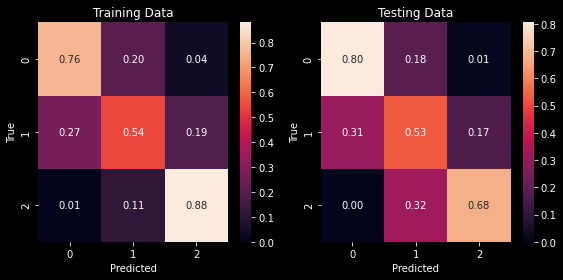

RandomForestClassifier(max_leaf_nodes=30)
              precision    recall  f1-score   support

           0       0.71      0.74      0.73        82
           1       0.59      0.54      0.56        78
           2       0.52      0.59      0.55        22

    accuracy                           0.64       182
   macro avg       0.61      0.62      0.61       182
weighted avg       0.64      0.64      0.64       182



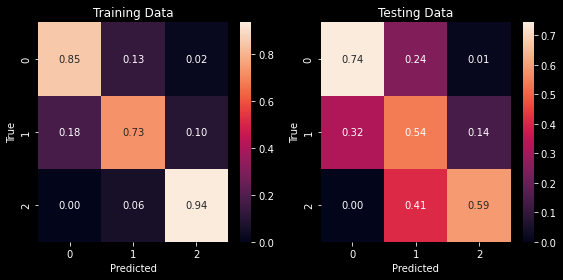

GradientBoostingClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        82
           1       0.64      0.45      0.53        78
           2       0.43      0.68      0.53        22

    accuracy                           0.63       182
   macro avg       0.59      0.64      0.60       182
weighted avg       0.64      0.63      0.63       182



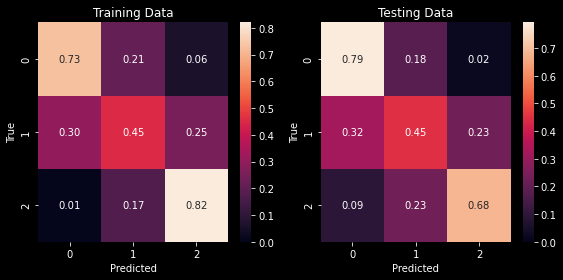

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        82
           1       0.62      0.41      0.49        78
           2       0.44      0.73      0.55        22

    accuracy                           0.63       182
   macro avg       0.59      0.65      0.60       182
weighted avg       0.63      0.63      0.62       182



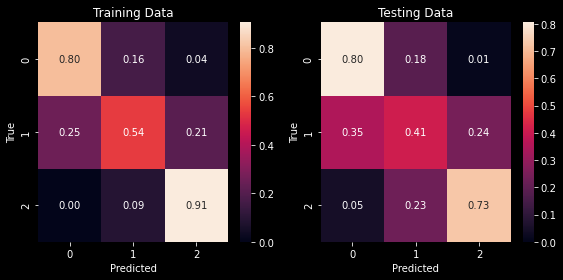

GradientBoostingClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        82
           1       0.67      0.54      0.60        78
           2       0.56      0.68      0.61        22

    accuracy                           0.68       182
   macro avg       0.65      0.68      0.66       182
weighted avg       0.68      0.68      0.68       182



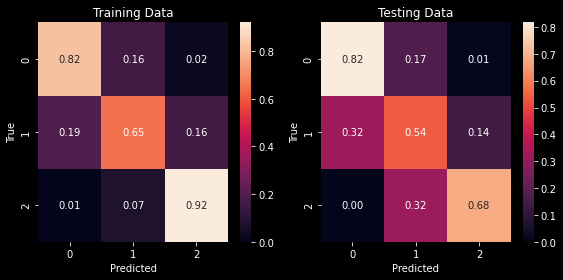

GradientBoostingClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        82
           1       0.64      0.60      0.62        78
           2       0.60      0.55      0.57        22

    accuracy                           0.69       182
   macro avg       0.66      0.65      0.66       182
weighted avg       0.68      0.69      0.68       182



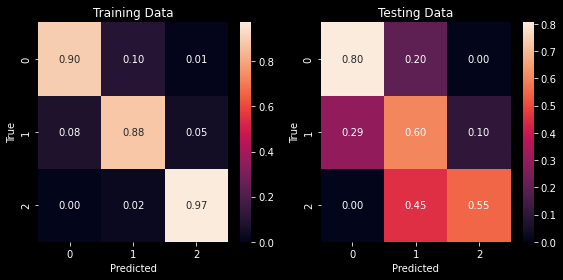

In [98]:
for m in models:
    # Train the model
    m.fit(X_train, y_train)
    
    print(m)

    # Generate predictions
    y_train_pred = m.predict(X_train).astype(int)
    y_test_pred = m.predict(X_test).astype(int)

    # Print classification report
    print(classification_report(y_test, y_test_pred))

    # Compute confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred).astype(float)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred).astype(float)

    # Normalize confusion matrices
    for i in range(conf_matrix_train.shape[0]):
        conf_matrix_train[i, :] /= conf_matrix_train[i, :].sum()
        conf_matrix_test[i, :] /= conf_matrix_test[i, :].sum()

    # Create subplots for confusion matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

    # Plot confusion matrix for training data
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='.2f', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")

    # Plot confusion matrix for test data
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='.2f', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")

    # Show the plots
    plt.tight_layout()
    plt.show()
# end

# CV with Keras

0
6/6 [==============================] - 0s 798us/step


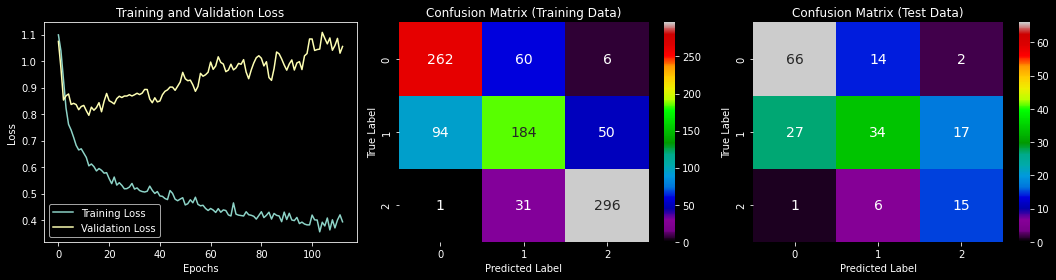

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        82
           1       0.63      0.44      0.52        78
           2       0.44      0.68      0.54        22

    accuracy                           0.63       182
   macro avg       0.59      0.64      0.60       182
weighted avg       0.64      0.63      0.62       182

1
6/6 [==============================] - 0s 614us/step


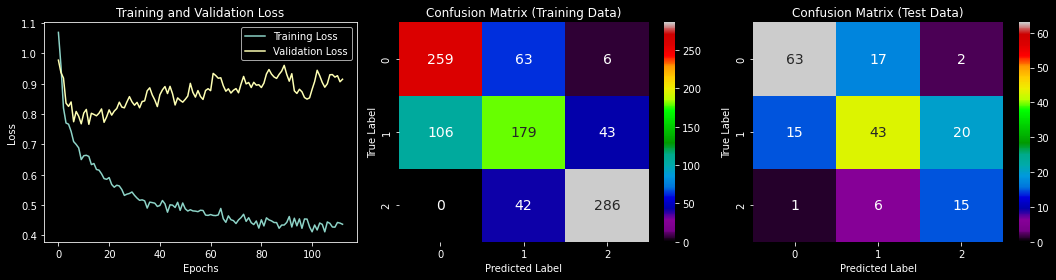

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        82
           1       0.65      0.55      0.60        78
           2       0.41      0.68      0.51        22

    accuracy                           0.66       182
   macro avg       0.62      0.67      0.63       182
weighted avg       0.69      0.66      0.67       182

2
6/6 [==============================] - 0s 602us/step


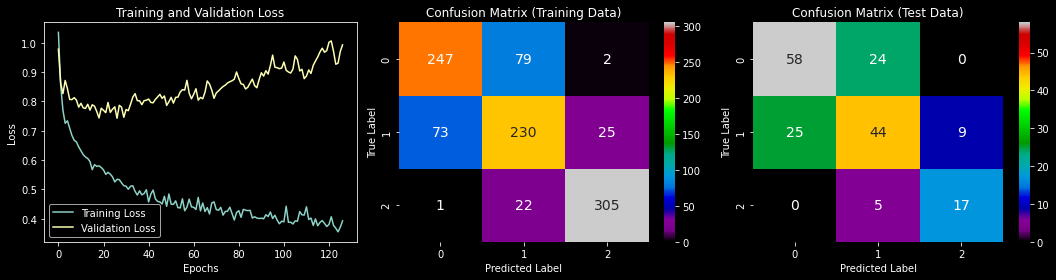

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        82
           1       0.60      0.56      0.58        78
           2       0.65      0.77      0.71        22

    accuracy                           0.65       182
   macro avg       0.65      0.68      0.66       182
weighted avg       0.65      0.65      0.65       182

3
6/6 [==============================] - 0s 798us/step


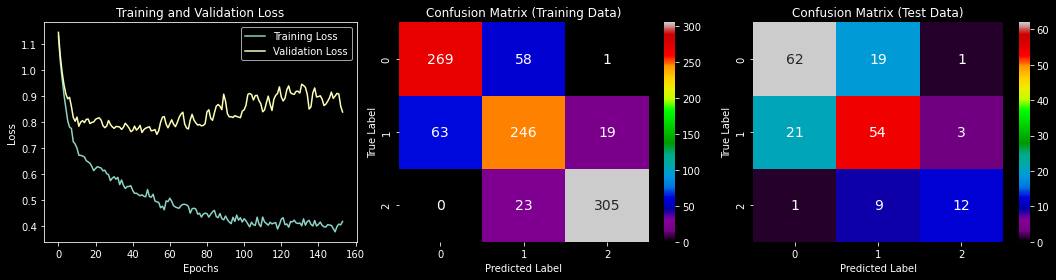

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        82
           1       0.66      0.69      0.68        78
           2       0.75      0.55      0.63        22

    accuracy                           0.70       182
   macro avg       0.72      0.66      0.68       182
weighted avg       0.71      0.70      0.70       182

4
6/6 [==============================] - 0s 696us/step


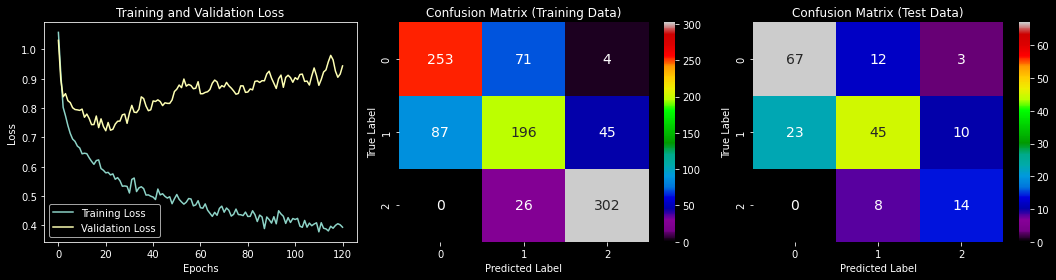

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        82
           1       0.69      0.58      0.63        78
           2       0.52      0.64      0.57        22

    accuracy                           0.69       182
   macro avg       0.65      0.68      0.66       182
weighted avg       0.69      0.69      0.69       182

5
6/6 [==============================] - 0s 598us/step


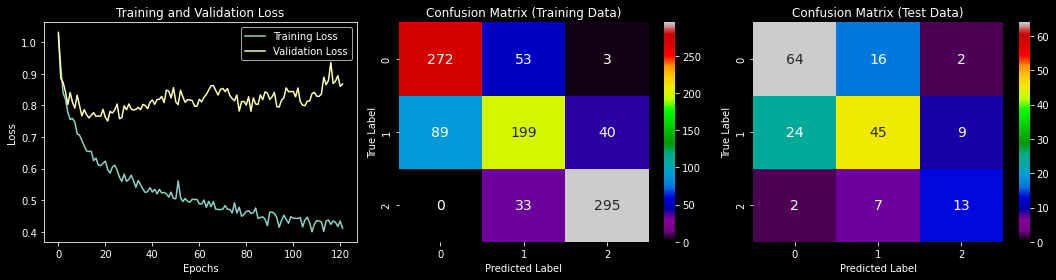

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        82
           1       0.66      0.58      0.62        78
           2       0.54      0.59      0.57        22

    accuracy                           0.67       182
   macro avg       0.64      0.65      0.64       182
weighted avg       0.67      0.67      0.67       182

6
6/6 [==============================] - 0s 598us/step


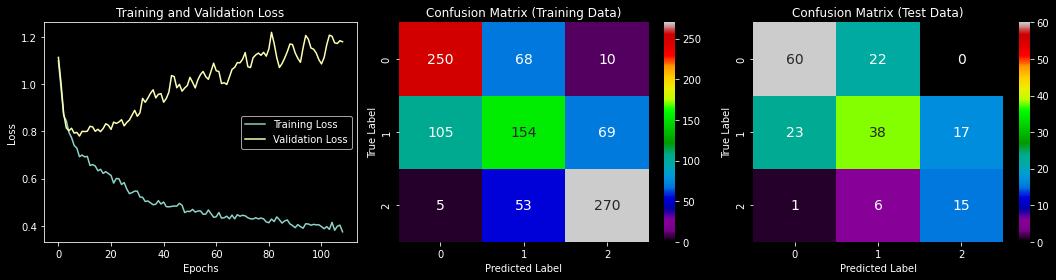

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        82
           1       0.58      0.49      0.53        78
           2       0.47      0.68      0.56        22

    accuracy                           0.62       182
   macro avg       0.59      0.63      0.60       182
weighted avg       0.63      0.62      0.62       182

7
6/6 [==============================] - 0s 798us/step


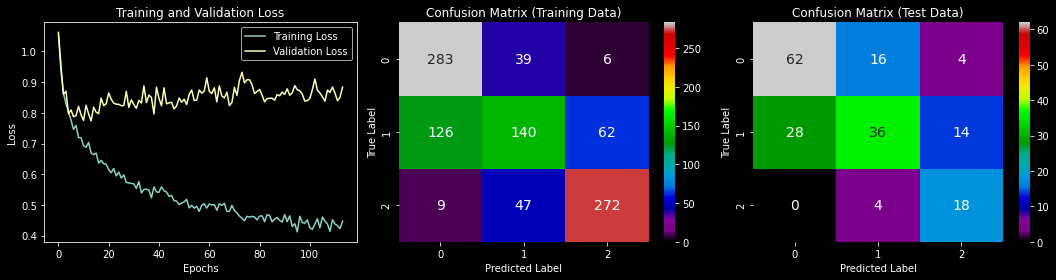

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        82
           1       0.64      0.46      0.54        78
           2       0.50      0.82      0.62        22

    accuracy                           0.64       182
   macro avg       0.61      0.68      0.63       182
weighted avg       0.65      0.64      0.63       182

8
6/6 [==============================] - 0s 798us/step


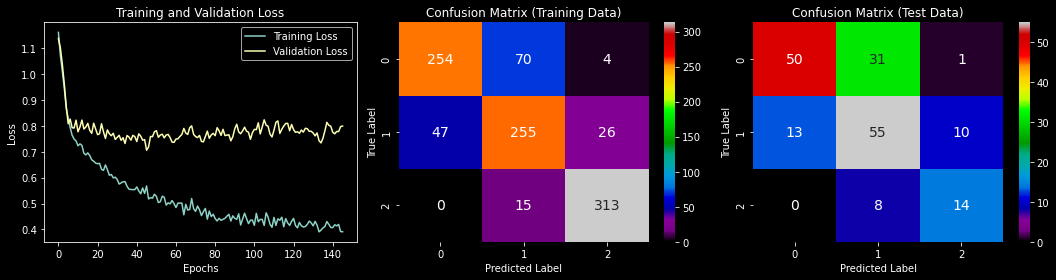

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        82
           1       0.59      0.71      0.64        78
           2       0.56      0.64      0.60        22

    accuracy                           0.65       182
   macro avg       0.65      0.65      0.64       182
weighted avg       0.68      0.65      0.66       182

9
6/6 [==============================] - 0s 807us/step


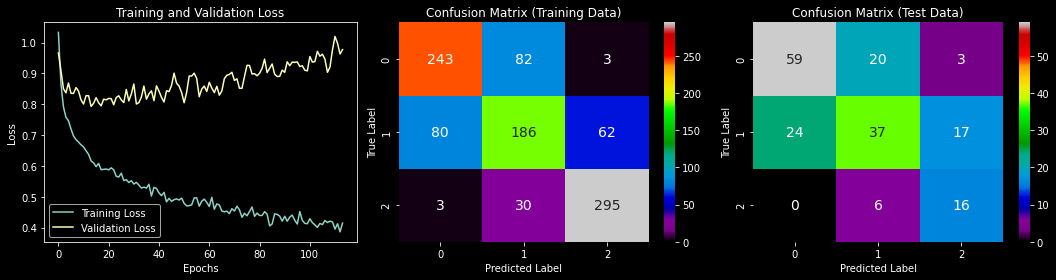

              precision    recall  f1-score   support

           0       0.71      0.72      0.72        82
           1       0.59      0.47      0.52        78
           2       0.44      0.73      0.55        22

    accuracy                           0.62       182
   macro avg       0.58      0.64      0.60       182
weighted avg       0.63      0.62      0.61       182



In [104]:
import tensorflow as tf

splits = 10

dropout_rate = 0.1
n_classes = np.unique(y).shape[0]

learning_rate = 0.01

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=100,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

for i in range(splits):
    tf.keras.backend.clear_session()
    
    print(i)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        stratify=y)
    smote = SMOTE(
        sampling_strategy='auto',
        k_neighbors=20,
    )
    
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Build model
    model = Sequential([
        Input(shape=X.shape[1]),
    
        Dense(20, activation='relu'),
        #BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(20, activation='relu'),
        #BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(20, activation='relu'),
        #BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(20, activation='relu'),
        
        Dense(n_classes, activation='softmax'),
    ])

    # Define the optimizer with a custom learning rate
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=1000,
        batch_size=256,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=0,
    )

    # Results
    
    # Get predictions
    y_train_pred = model.predict(X_train).argmax(axis=1)
    y_test_pred  = model.predict(X_test).argmax(axis=1)
    
    # Compute confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Left subplot: Training and Validation Loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    # Middle subplot: Confusion Matrix (Training Data)
    sns.heatmap(cm_train, annot=True, fmt='d', ax=axes[1], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
    axes[1].set_title('Confusion Matrix (Training Data)')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    
    # Right subplot: Confusion Matrix (Test Data)
    sns.heatmap(cm_test, annot=True, fmt='d', ax=axes[2], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
    axes[2].set_title('Confusion Matrix (Test Data)')
    axes[2].set_xlabel('Predicted Label')
    axes[2].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()
    
    # Print classification report for test data
    report = classification_report(y_test, y_test_pred)
    print(report)
# END

# Custom ordinal loss function

In [116]:
import tensorflow as tf

def OrdinalLoss(y_true, y_pred):
    # Cast y_true to float32 to match y_pred's type
    y_true = tf.cast(y_true, tf.float32)
    
    y_pred = tf.clip_by_value(y_pred, 1e-15, 1 - 1e-15)
    
    cum_true = tf.cumsum(y_true, axis=-1)
    cum_pred = tf.cumsum(y_pred, axis=-1)
    
    loss = tf.reduce_sum((cum_true - cum_pred) ** 2, axis=-1)
    
    return loss
# end

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

dropout_rate = 0.1

n_classes = np.unique(y).shape[0]

# Create model
model = Sequential([
    Input(shape=X.shape[1]),

    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    #BatchNormalization(),
    Dropout(dropout_rate),
    
    Dense(20, activation='relu'),
    
    Dense(n_classes, activation='softmax'),
])

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.01)

# Compile model
model.compile(
    optimizer=optimizer,
    loss=OrdinalLoss,
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=100,          # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best weights after stopping
)

# Display model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                240       
                                                                 
 dropout_12 (Dropout)        (None, 20)                0         
                                                                 
 dense_21 (Dense)            (None, 20)                420       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dropout_14 (Dropout)        (None, 20)                0         
                                                                 
 dense_23 (Dense)            (None, 20)               

In [118]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=0,
)

6/6 [==============================] - 0s 798us/step


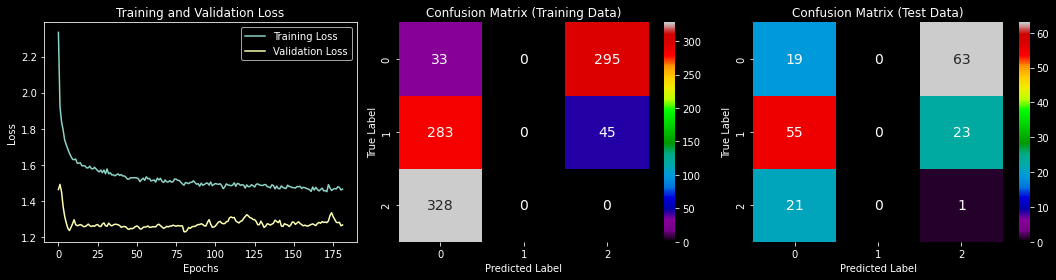

              precision    recall  f1-score   support

           0       0.20      0.23      0.21        82
           1       0.00      0.00      0.00        78
           2       0.01      0.05      0.02        22

    accuracy                           0.11       182
   macro avg       0.07      0.09      0.08       182
weighted avg       0.09      0.11      0.10       182



In [119]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_train_pred = model.predict(X_train).argmax(axis=1)
y_test_pred  = model.predict(X_test).argmax(axis=1)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Left subplot: Training and Validation Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Middle subplot: Confusion Matrix (Training Data)
sns.heatmap(cm_train, annot=True, fmt='d', ax=axes[1], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
axes[1].set_title('Confusion Matrix (Training Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Right subplot: Confusion Matrix (Test Data)
sns.heatmap(cm_test, annot=True, fmt='d', ax=axes[2], vmin=0, annot_kws={"size": 14}, cmap='nipy_spectral')
axes[2].set_title('Confusion Matrix (Test Data)')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print classification report for test data
report = classification_report(y_test, y_test_pred)
print(report)